In [18]:
import pandas as pd
import numpy as np
import seaborn as sns  
#sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
df=pd.read_csv("Telco-Customer-Churn.csv")

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [12]:
df1=df.copy()

In [13]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#covertion of sata type
df1["TotalCharges"]=pd.to_numeric(df1["TotalCharges"],errors="coerce")

In [19]:
df1["SeniorCitizen"]=df1["SeniorCitizen"].astype('object')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

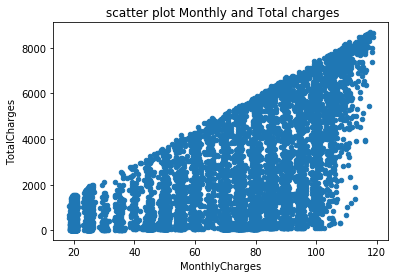

In [22]:
df1[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges',y='TotalCharges')
plt.title(" scatter plot Monthly and Total charges")
plt.show()

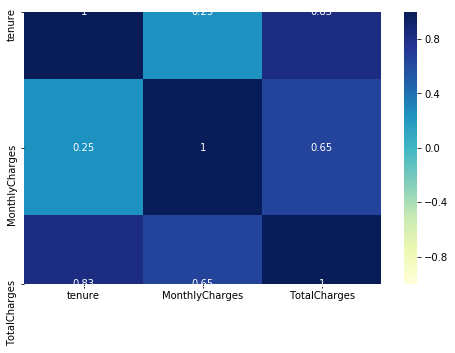

In [23]:
plt.rcParams['figure.figsize']=[8,5]
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu',vmin=-1,vmax=1)
plt.show()

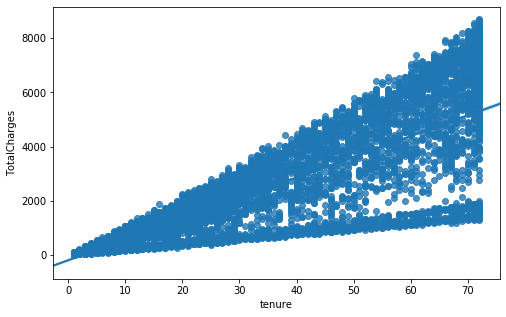

In [25]:
sns.regplot(x='tenure',y='TotalCharges',data=df1)


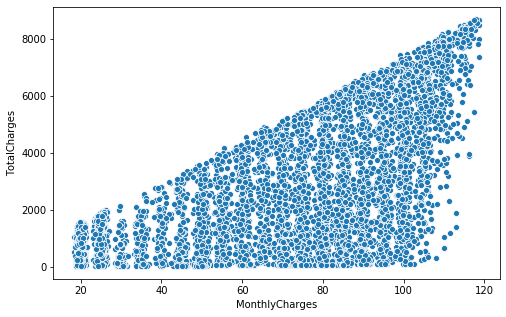

In [27]:
sns.scatterplot(data=df1,x='MonthlyCharges',y='TotalCharges')

In [ ]:
#Box plot [Categorical to Categorical]
# Cross tab, Stacked bar chart, Count plot

#Quanititative/Qualitative to Quanititative/Qualitative
#Scatter plot, Heat map, Regression plot

#Quantitative/Qualitative to Categorical
#Bar chart, Kernal density plot, Box, Violin plot, Strip plot, Swarm plot

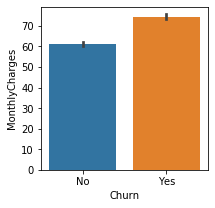

In [30]:
plt.figure(figsize=(3,3))
sns.barplot(x='Churn',y='MonthlyCharges',data=df1)
plt.show()

Text(0.5, 1.0, 'Distribution of monthly charges by Churn')

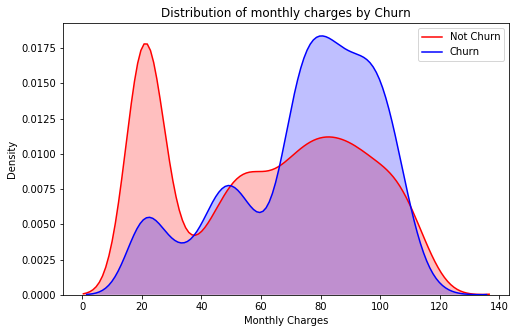

In [38]:
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"]=="No")],color ="Red",shade=True)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"]=="Yes")],ax=ax,color ="Blue",shade=True)
ax.legend(["Not Churn","Churn"],loc="upper right")
ax.set_ylabel ("Density")
ax.set_xlabel ("Monthly Charges")
ax.set_title ("Distribution of monthly charges by Churn")

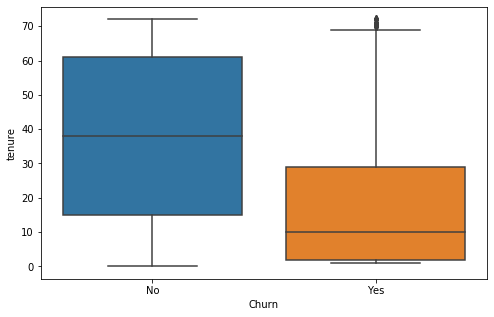

In [39]:
sns.boxplot(x=df1.Churn,y=df1.tenure)

Text(0.5, 1.0, 'Distribution of monthly charges by Churn')

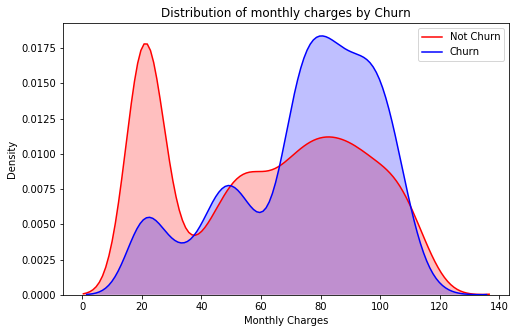

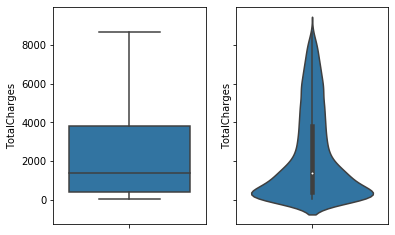

In [41]:
fig,axes=plt.subplots(1,2,sharey=True,figsize=(6,4))
sns.boxplot(data=df1,y='TotalCharges',ax=axes[0])
sns.violinplot(data=df1,y='TotalCharges',ax=axes[1])

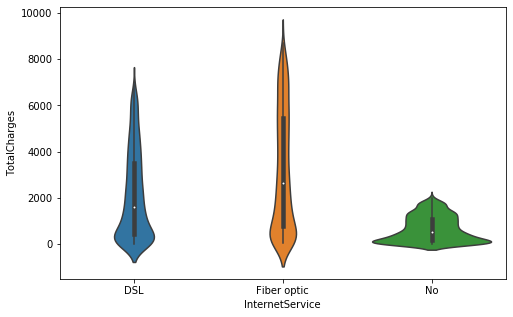

In [42]:
sns.violinplot(x=df1 ["InternetService"],y=df1["TotalCharges"])

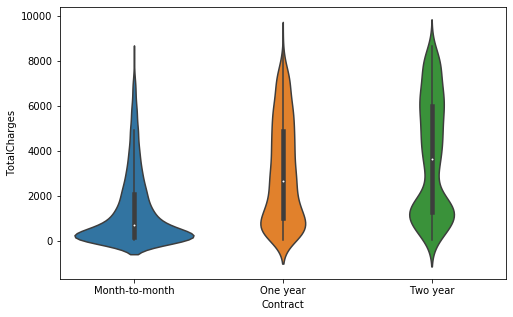

In [43]:
sns.violinplot(x=df1 ["Contract"],y=df1["TotalCharges"])

In [44]:
import warnings
warnings.filterwarnings("ignore")

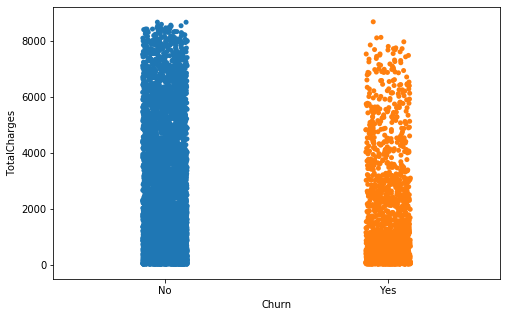

In [46]:
sns.stripplot(y=df1["TotalCharges"],x=df1['Churn'])

In [53]:
print(df1['TotalCharges'].mean())
print(df1['TotalCharges'][df1["Churn"]=="Yes"].mean())
print(df1['TotalCharges'][df1["Churn"]=="No"].mean())

2283.3004408418697
1531.7960941680035
2555.3441410032997


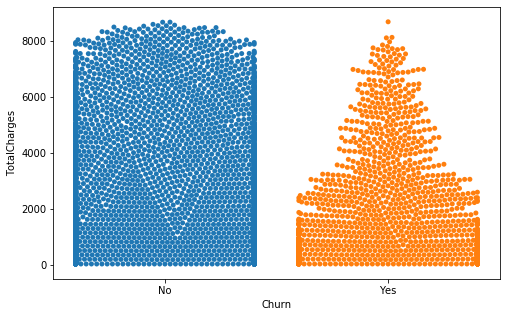

In [55]:
sns.swarmplot(y=df1["TotalCharges"],x=df1['Churn'])

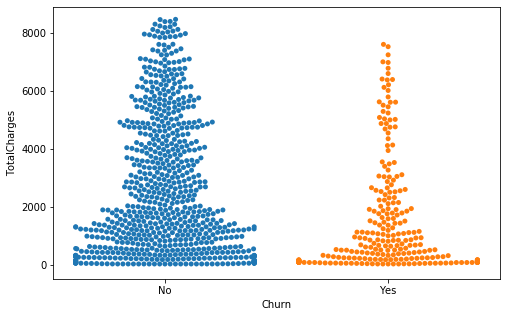

In [56]:
sns.swarmplot(y="TotalCharges",x="Churn",data=df1.iloc[0:1000,:])

In [ ]:
#box = outliers
#violin plot - distribution and spread data
#Bar and kernal density plot - 

In [59]:
table = pd.crosstab(index=df1['Churn'],columns=df1['InternetService'])
table

InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113


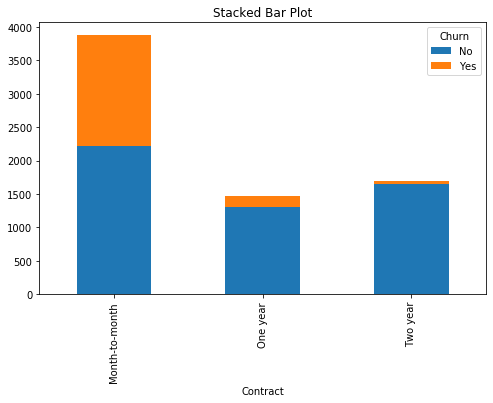

In [60]:
stack=pd.pivot_table(df1,index=["Contract"],columns=["Churn"],values="customerID",aggfunc="count")
stack.plot.bar(title="Stacked Bar Plot",stacked=True)

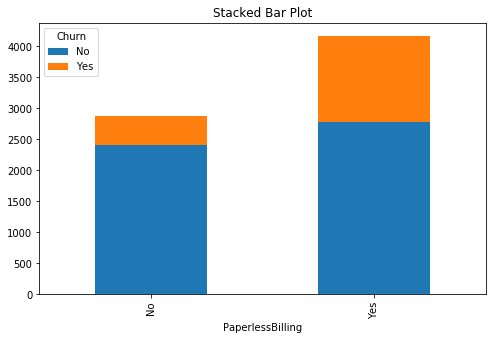

In [61]:
stack=pd.pivot_table(df1,index=["PaperlessBilling"],columns=["Churn"],values="customerID",aggfunc="count")
stack.plot.bar(title="Stacked Bar Plot",stacked=True)

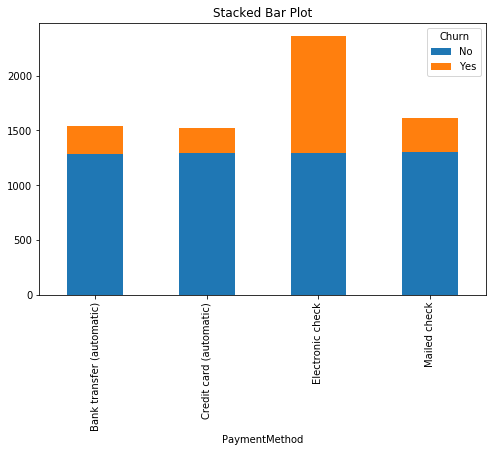

In [62]:
stack=pd.pivot_table(df1,index=["PaymentMethod"],columns=["Churn"],values="customerID",aggfunc="count")
stack.plot.bar(title="Stacked Bar Plot",stacked=True)

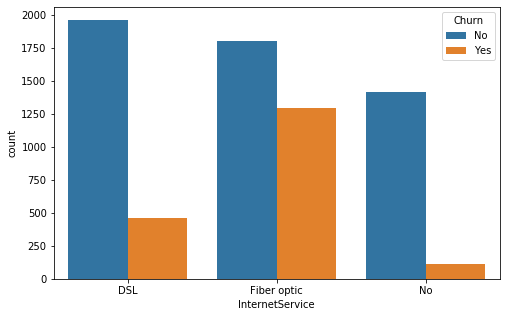

In [63]:
sns.countplot(x='InternetService',hue='Churn',data =df1)

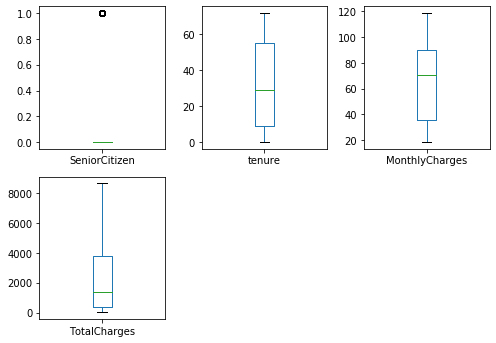

In [66]:
plt.rcParams['figure.figsize']=[7,7]
df1.plot(kind='box',subplots=True,layout=(3,3))
plt.tight_layout()
plt.show()